<a href="https://colab.research.google.com/github/Sanil967/numpy/blob/main/Set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 SET 1: Iris Dataset (Flower Classification)
Dataset: iris.csv (contains features of iris flowers: sepal length, sepal width, petal length, petal width, and species)
Load the Iris dataset into a Pandas DataFrame and display the first five rows.

Check if there are any missing values in the dataset.

Display only the 'sepal length' and 'species' columns.

Compute the average petal length for each species using Pandas.

Create a new column sepal_area which represents the product of sepal length and sepal width for each observation.

Filter the dataset to include only rows where petal width > 1.5 and display the first five rows.

Find the maximum sepal length for the species 'versicolor'.

Use Pandas to group the dataset by species and calculate the mean of sepal width for each group.

Define the independent variables (X) and dependent variable (y) for predicting the species of the flower.

Split the dataset into 80% training and 20% testing sets.

Apply a Logistic Regression model and a KNN model to predict the species of the flower.

Print the confusion matrix and accuracy score for both models.

Compare the accuracy of both models using a bar graph

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
data=pd.read_csv("/content/drive/MyDrive/dataset/iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
data.dropna(inplace=True)

Compute the average petal length for each species using Pandas.

In [10]:
avglen=data.groupby('variety')['petal.length'].mean()
avglen

,petal.length
variety,
Setosa,1.462
Versicolor,4.260
Virginica,5.552


Display only the 'sepal length' and 'species' columns.

In [11]:
Display=data[['sepal.length','petal.length']]
Display

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


Create a new column sepal_area which represents the product of sepal length and sepal width for each observation.

In [12]:
data['sepal_area']=data['sepal.length']*data['sepal.width']
data['sepal_area']

,sepal_area
0,17.85
1,14.70
2,15.04
3,14.26
4,18.00
...,...
145,20.10
146,15.75
147,19.50
148,21.08


Filter the dataset to include only rows where petal width > 1.5 and display the first five rows.

In [13]:
ppeatl=data[data['petal.width']>1.5]
ppeatl.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_area
56,6.3,3.3,4.7,1.6,Versicolor,20.79
70,5.9,3.2,4.8,1.8,Versicolor,18.88
77,6.7,3.0,5.0,1.7,Versicolor,20.10
83,6.0,2.7,5.1,1.6,Versicolor,16.20
85,6.0,3.4,4.5,1.6,Versicolor,20.40


Find the maximum sepal length for the species 'versicolor'.

In [14]:
Max_sepl=data.groupby('variety')['sepal.length'].max()
Max_sepl

,sepal.length
variety,
Setosa,5.8
Versicolor,7.0
Virginica,7.9


Use Pandas to group the dataset by species and calculate the mean of sepal width for each group.

In [16]:
spec_w=data.groupby('variety')['sepal.width'].mean()
spec_w

,sepal.width
variety,
Setosa,3.428
Versicolor,2.770
Virginica,2.974


Define the independent variables (X) and dependent variable (y) for predicting the species of the flower.

In [18]:
x=data[['sepal.length','sepal.width','petal.length','petal.width']]
y=data['variety']
x,y

(     sepal.length  sepal.width  petal.length  petal.width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Setosa
 1         Setosa
 2         Setosa
 3         Setosa
 4         Setosa
          ...    
 145    Virginica
 146    Virginica
 147    Virginica
 148    Virginica
 149    Virginica
 Name: variety, Length: 150, dtype: object)

plit the dataset into 80% training and 20% testing sets.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(     sepal.length  sepal.width  petal.length  petal.width
 139           6.9          3.1           5.4          2.1
 5             5.4          3.9           1.7          0.4
 55            5.7          2.8           4.5          1.3
 28            5.2          3.4           1.4          0.2
 65            6.7          3.1           4.4          1.4
 ..            ...          ...           ...          ...
 78            6.0          2.9           4.5          1.5
 57            4.9          2.4           3.3          1.0
 18            5.7          3.8           1.7          0.3
 46            5.1          3.8           1.6          0.2
 105           7.6          3.0           6.6          2.1
 
 [120 rows x 4 columns],
      sepal.length  sepal.width  petal.length  petal.width
 84            5.4          3.0           4.5          1.5
 33            5.5          4.2           1.4          0.2
 66            5.6          3.0           4.5          1.5
 130           7.4          2

Apply a Logistic Regression model and a KNN model to predict the species of the flower.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
logpred=reg.predict(x_test)
logpred

array(['Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor'],
      dtype=object)

In [29]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
knnpred=knn.predict(x_test)
knnpred

array(['Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor'],
      dtype=object)

Print the confusion matrix and accuracy score for both models.

In [32]:
accsclog=accuracy_score(y_test,logpred)
accsclog

0.9333333333333333

In [34]:
acckn=accuracy_score(y_test,knnpred)
acckn

0.9

In [35]:
conflog=confusion_matrix(y_test,logpred)
conflog

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 10]])

In [36]:
confkn=confusion_matrix(y_test,knnpred)
confkn

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]])

Compare the accuracy of both models using a bar graph

<BarContainer object of 2 artists>

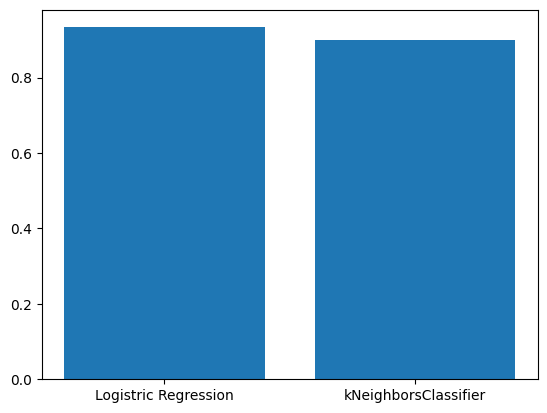

In [38]:
bar=[accsclog,acckn]
label=['Logistric Regression','kNeighborsClassifier']
plt.bar(label,bar)